In [3]:
import numpy as np
import mne
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn import preprocessing
from ARMA import ARMA
import pywt
from scipy.stats import skew


In [ ]:
def load_EEG(filepath, label):
    if label == 'preictal':
        data = np.load(filepath)
        target = np.ones(data.shape[1])
    if label == 'ictal':
        data = np.load(filepath)
        target = -1
    return data, target

In [25]:
def load_EEG(filepath, label):
    if label == 'interictal':
        data = np.load(filepath)
    if label == 'ictal':
        data = np.load(filepath)
    return data

In [4]:
rootdir = f'{os.getcwd()}/data/'
cases = ['chb01', 'chb02', 'chb03']
seconds = ['10s']
preictal_data = []
ictal_data = []

for i in range(len(cases)):
    
    temp_ictal = []
    temp_preictal = []
    
    temp_ictal = os.listdir(rootdir+cases[i]+'/ictal/')
    temp_preictal = os.listdir(rootdir+cases[i]+'/preictal_10s/')
    
    if '.DS_Store' in temp_ictal: temp_ictal.remove('.DS_Store')
    if '.DS_Store' in temp_preictal: temp_preictal.remove('.DS_Store')
    
    
    for j in range(len(temp_ictal)):
        #load preictal data
        pi_filepath = rootdir+cases[i]+'/preictal_10s/'+temp_preictal[j]
        pi_data, pi_target = load_EEG(pi_filepath, 'preictal')
        
        #load ictal data
        ic_filepath = rootdir+cases[i]+'/ictal/'+temp_ictal[j]
        ic_data, ic_target = load_EEG(ic_filepath, 'ictal')
        
        #store data in list
        preictal_data.append(pi_data)
        ictal_data.append(ic_data)


# Wavelet decomposition

In [26]:
rootdir = f'{os.getcwd()}/data/'
cases = ['chb01']
interictal_data = []
ictal_data = []


for i in range(len(cases)):
    
    ii_path = rootdir+cases[i]+f'/feature_interictal/{cases[0]}_feature_interictal.npy'
    ic_path = rootdir+cases[i]+f'/feature_ictal/{cases[0]}_feature_ictal.npy'
    
    interictal_data = load_EEG(ii_path, 'interictal')
    ictal_data = load_EEG(ic_path,'ictal')
    


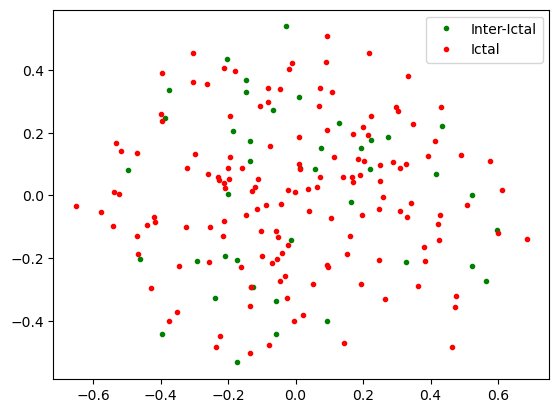

In [41]:
pca_interictal = []
pca_ictal = []
x1 = []
x2 = []
x3 = []
x4 = []

pca = PCA(n_components=2)

pca_interictal = (pca.fit_transform(preprocessing.normalize(interictal_data)))
pca_ictal = (pca.fit_transform(preprocessing.normalize(ictal_data)))

x1.append(pca_interictal[:,0])
x2.append(pca_interictal[:,1])
x3.append(pca_ictal[:,0])
x4.append(pca_ictal[:,1])

plt.figure()
for i in range(len(x1)):
    plt.plot(x1[i], x2[i], '.',label = 'Inter-Ictal' if i == 0 else "", color="green")
    plt.plot(x3[i], x4[i], '.', label = 'Ictal' if i == 0 else "", color = "red")


plt.legend()
plt.show()



In [5]:
pca_preictal = []
pca_ictal = []
x1 = []
x2 = []
x3 = []
x4 = []

pca = PCA(n_components=2)

m, _, _ = np.shape(preictal_data)

for i in range(m):
    pca_preictal.append(pca.fit_transform(preprocessing.normalize(preictal_data[i])))
    pca_ictal.append(pca.fit_transform(preprocessing.normalize(ictal_data[i])))

np.shape(pca_preictal)

for i in range(m):
    x1.append(pca_preictal[i][:,0])
    x2.append(pca_preictal[i][:,1])
    x3.append(pca_ictal[i][:,0])
    x4.append(pca_ictal[i][:,0])





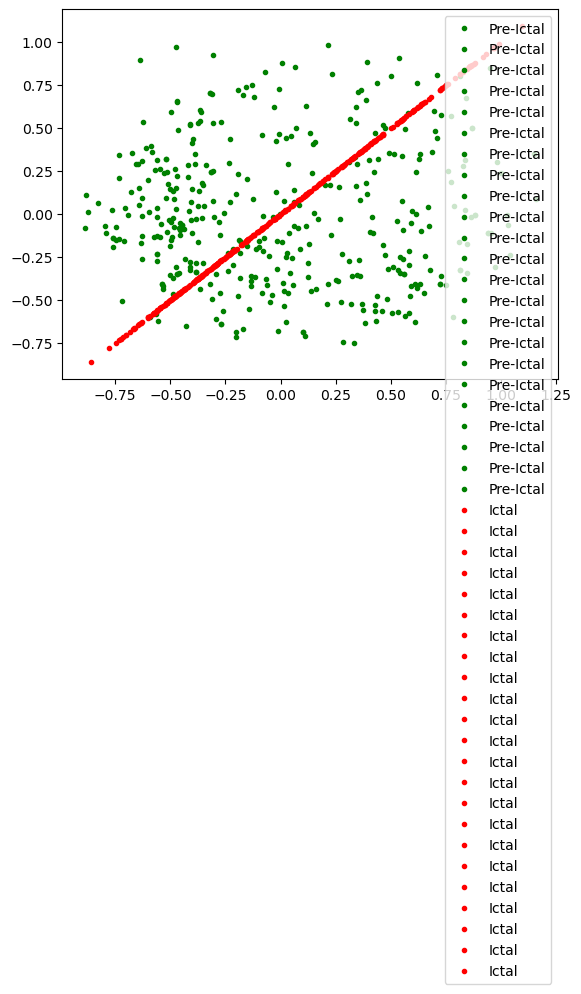

In [6]:
plt.figure()
plt.plot(x1, x2, '.',label = 'Pre-Ictal', color="green")
plt.plot(x3, x4, '.', label = 'Ictal', color = "red")

plt.legend()
plt.show()

In [45]:
df = pd.DataFrame({'Feature 1':x1, 'Feature 2':x2})
df['Interval'] = 'Preictal'

df_2 = pd.DataFrame({'Feature 1':x3, 'Feature 2':x4})
df_2['Interval'] = 'Ictal'
frames = [df, df_2]
rdf = pd.concat(frames)
rdf

,Feature 1,Feature 2,Interval
0,"[0.6996284075422822, -0.134024697835657, -0.73...","[0.4857336004994997, -0.3871155262772007, 0.21...",Preictal
1,"[0.15482931665896013, -0.3019949535501216, -0....","[0.421866112433464, -0.015679455938552595, -0....",Preictal
2,"[-0.021153330436525338, -0.6904148094667393, -...","[0.42369414018939705, -0.0020179826839831867, ...",Preictal
3,"[-0.041207337076324124, -0.35416068186730876, ...","[-0.4708628587163226, -0.2819596247195791, -0....",Preictal
4,"[-0.03148902257829121, -0.5131686374817039, -0...","[0.6214233389284869, 0.2468860451145279, -0.60...",Preictal
5,"[-0.2274403137748781, -0.3829930189117408, 0.4...","[0.4395087404988049, -0.029146180769054248, -0...",Preictal
6,"[-0.27619192069989573, 0.02300401266682069, 0....","[-0.12170661274318514, -0.24798269756893213, -...",Preictal
7,"[-0.43507540522899524, -0.3133128910902732, 0....","[-0.26288263386589206, -0.4897484136263716, 0....",Preictal
8,"[-0.3752522648941838, -0.3954873612501402, 0.3...","[-0.15986206183029142, 0.4368968730344203, -0....",Preictal
9,"[0.6706375238153287, 0.4296052965290445, -0.74...","[-0.06871972410028858, -0.5290352424205418, -0...",Preictal
